Converged in 130 epochs.


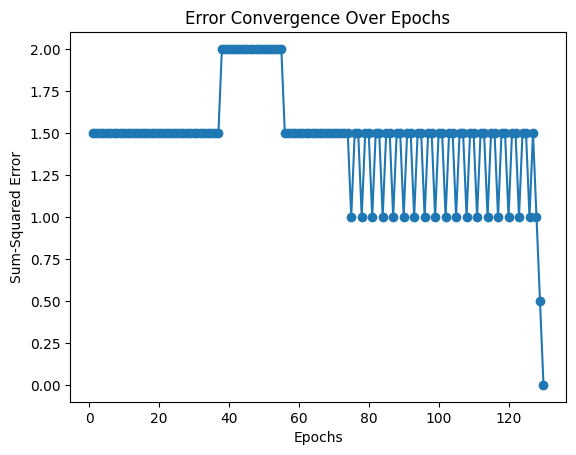

Final weights: [-0.1   0.1   0.05]


In [15]:
#A1
import numpy as np
import matplotlib.pyplot as plt
initial_weights = np.array([10, 0.2, -0.75])
input_data = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])
desired_output = np.array([0, 0, 0, 1])
learning_rate = 0.05
max_epochs = 1000
convergence_threshold = 0.002
def step_activation(x):
    return 1 if x >= 0 else 0
def train_perceptron(input_data, desired_output, initial_weights, learning_rate, max_epochs, convergence_threshold):
    error_values = []
    weights = np.copy(initial_weights)
    for epoch in range(max_epochs):
        error_sum = 0
        for i in range(len(input_data)):
            prediction = step_activation(np.dot(input_data[i], weights))
            error = desired_output[i] - prediction
            weights = weights + learning_rate * error * input_data[i]
            error_sum += error ** 2
        total_error = 0.5 * error_sum
        error_values.append(total_error)
        if total_error <= convergence_threshold:
            print(f"Converged in {epoch + 1} epochs.")
            break
    return weights, error_values
final_weights, errors = train_perceptron(input_data, desired_output, initial_weights, learning_rate, max_epochs, convergence_threshold)

plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs')
plt.show()
print("Final weights:", final_weights)

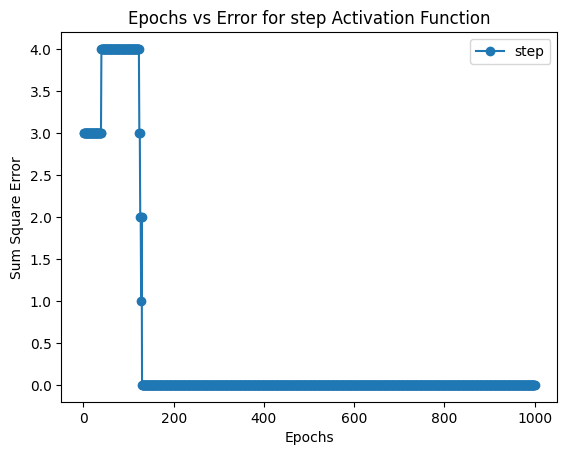

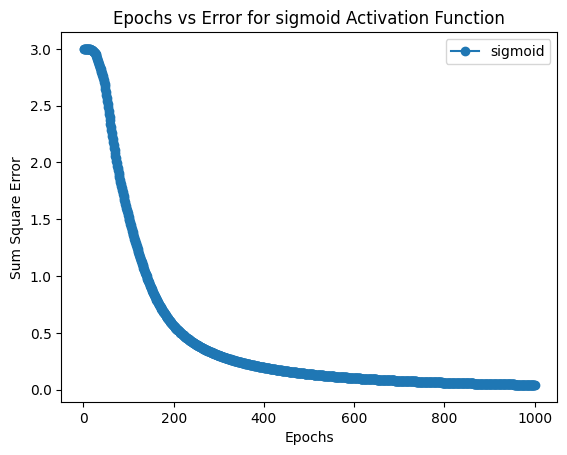

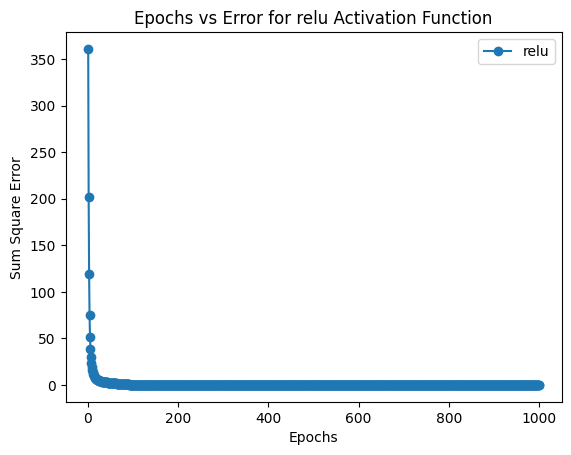

In [14]:
#A2
import matplotlib.pyplot as plt
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate, initial_weights):
        self.weights = np.array(initial_weights)
        self.learning_rate = learning_rate
        self.errors = []
    def step_activation(self, net_input):
        return 1 if net_input >= 0 else 0
    def sigmoid_activation(self, net_input):
        return 1 / (1 + np.exp(-net_input))
    def relu_activation(self, net_input):
        return max(0, net_input)
    def apply_activation(self, net_input, activation_function):
        if activation_function == 'step':
            return self.step_activation(net_input)
        elif activation_function == 'sigmoid':
            return self.sigmoid_activation(net_input)
        elif activation_function == 'relu':
            return self.relu_activation(net_input)
    def calculate_error(self, inputs, targets, activation_function):
        total_error = 0
        for input_data, target in zip(inputs, targets):
            net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
            predicted_output = self.apply_activation(net_input, activation_function)
            total_error += (target - predicted_output) ** 2
        return total_error
    def train(self, inputs, targets, epochs, learning_rate, activation_function):
        for epoch in range(epochs):
            total_error = self.calculate_error(inputs, targets, activation_function)
            self.errors.append(total_error)
            for input_data, target in zip(inputs, targets):
                net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
                predicted_output = self.apply_activation(net_input, activation_function)
                error = target - predicted_output
                self.weights[1:] += learning_rate * error * input_data
                self.weights[0] += learning_rate * error
initial_weights = [10, 0.2, -0.75]
learning_rate = 0.05
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])
activation_functions = ['step', 'sigmoid', 'relu']
for activation_function in activation_functions:
    perceptron = Perceptron(input_size=2, learning_rate=learning_rate, initial_weights=initial_weights)
    perceptron.train(inputs, targets, epochs=1000, learning_rate=learning_rate, activation_function=activation_function)
    plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o', label=activation_function)
    plt.xlabel('Epochs')
    plt.ylabel('Sum Square Error')
    plt.title(f'Epochs vs Error for {activation_function} Activation Function')
    plt.legend()
    plt.show()



Training with learning rate: 0.1

Training with learning rate: 0.2

Training with learning rate: 0.3

Training with learning rate: 0.4

Training with learning rate: 0.5

Training with learning rate: 0.6

Training with learning rate: 0.7

Training with learning rate: 0.8

Training with learning rate: 0.9

Training with learning rate: 1


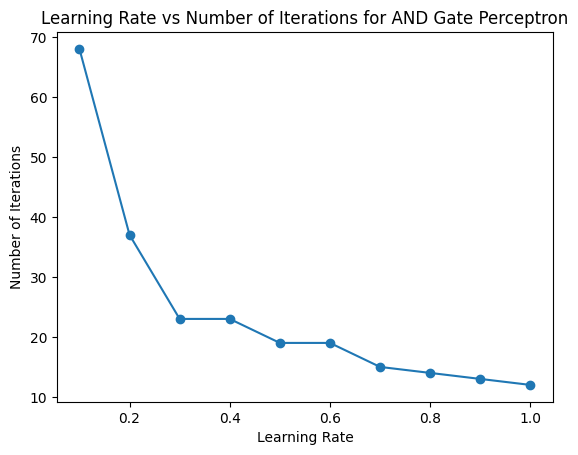

In [3]:
#A3
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, input_size, learning_rate, initial_weights):
        self.weights = np.array(initial_weights)
        self.learning_rate = learning_rate
        self.errors = []
    def step_activation(self, net_input):
        return 1 if net_input >= 0 else 0
    def calculate_error(self, inputs, targets):
        total_error = 0
        for input_data, target in zip(inputs, targets):
            net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
            predicted_output = self.step_activation(net_input)
            total_error += (target - predicted_output) ** 2
        return total_error
    def train(self, inputs, targets, max_epochs=1000, convergence_threshold=0.002):
        for epoch in range(max_epochs):
            total_error = self.calculate_error(inputs, targets)
            self.errors.append(total_error)
            if total_error <= convergence_threshold:
                return epoch + 1
            for input_data, target in zip(inputs, targets):
                net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
                predicted_output = self.step_activation(net_input)
                error = target - predicted_output
                self.weights[1:] += self.learning_rate * error * input_data
                self.weights[0] += self.learning_rate * error
        return max_epochs 
initial_weights = [10, 0.2, -0.75]
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])
iterations_list = []
for learning_rate in learning_rates:
    print(f"\nTraining with learning rate: {learning_rate}")
    perceptron = Perceptron(input_size=2, learning_rate=learning_rate, initial_weights=initial_weights)
    iterations = perceptron.train(inputs, targets)
    iterations_list.append(iterations)
plt.plot(learning_rates, iterations_list, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.title('Learning Rate vs Number of Iterations for AND Gate Perceptron')
plt.show()


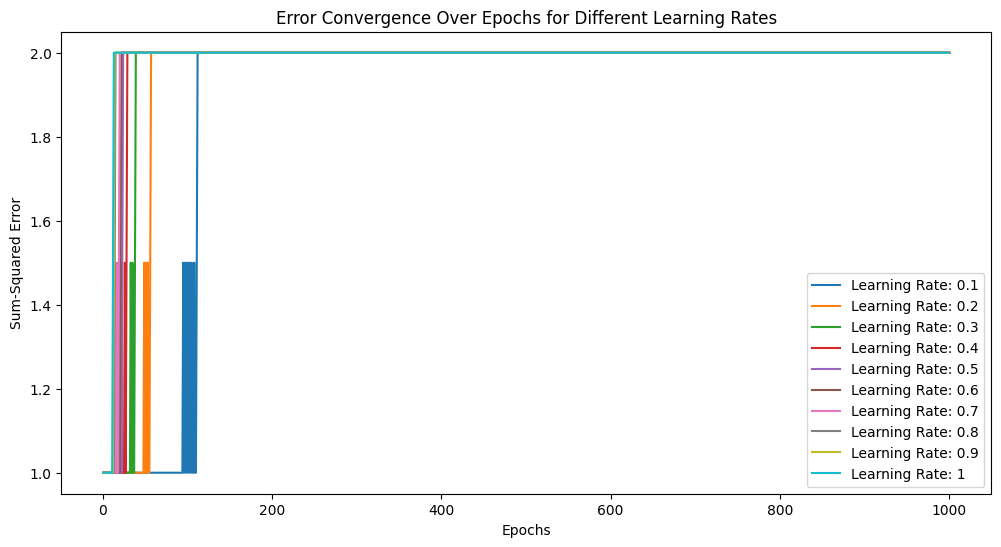

In [15]:
#A4
import numpy as np
import matplotlib.pyplot as plt
W = np.array([10, 0.2, -0.75])
X_xor = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y_xor = np.array([0, 1, 1, 0])
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
def step_activation(x):
    return 1 if x >= 0 else 0
def train_perceptron(X, y, W, alpha, max_epochs, convergence_error):
    error_values = []
    for epoch in range(max_epochs):
        error_sum = 0
        for i in range(len(X)):
            prediction = step_activation(np.dot(X[i], W))
            error = y[i] - prediction
            W = W + alpha * error * X[i]
            error_sum += error ** 2
        total_error = 0.5 * error_sum
        error_values.append(total_error)
    return error_values
plt.figure(figsize=(12, 6))
for alpha in alpha_values:
    errors = train_perceptron(X_xor, y_xor, W, alpha, max_epochs=1000, convergence_error=0.002)
    plt.plot(range(1, len(errors) + 1), errors, label=f'Learning Rate: {alpha}')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error Convergence Over Epochs for Different Learning Rates')
plt.legend()
plt.show()

In [11]:
#A5
import numpy as np
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])
X = data[:, :-1]
y = data[:, -1]
weights = np.random.rand(X.shape[1])
learning_rate = 0.01
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
for epoch in range(1000):
    for i in range(X.shape[0]):
        # Forward pass
        z = np.dot(X[i], weights)
        prediction = sigmoid(z)
        error = y[i] - prediction
        weights += learning_rate * error * prediction * (1 - prediction) * X[i]
for i in range(X.shape[0]):
    z = np.dot(X[i], weights)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")

Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = False
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = False
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = False
Transaction 10: Predicted High Value = False


In [16]:
#A6
import numpy as np
data = np.array([
    [20, 6, 2, 1],
    [16, 3, 6, 1],
    [27, 6, 2, 1],
    [19, 1, 2, 0],
    [24, 4, 2, 1],
    [22, 1, 5, 0],
    [15, 4, 2, 1],
    [18, 4, 2, 1],
    [21, 1, 4, 0],
    [16, 2, 4, 0]
])
X = data[:, :-1]
y = data[:, -1]
X_pseudo_inv = np.linalg.pinv(X)
weights_pseudo_inv = np.dot(X_pseudo_inv, y)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
for i in range(X.shape[0]):
    z = np.dot(X[i], weights_pseudo_inv)
    prediction = sigmoid(z)
    print(f"Transaction {i+1}: Predicted High Value = {prediction > 0.5}")

Transaction 1: Predicted High Value = True
Transaction 2: Predicted High Value = True
Transaction 3: Predicted High Value = True
Transaction 4: Predicted High Value = False
Transaction 5: Predicted High Value = True
Transaction 6: Predicted High Value = True
Transaction 7: Predicted High Value = True
Transaction 8: Predicted High Value = True
Transaction 9: Predicted High Value = True
Transaction 10: Predicted High Value = True


In [18]:
#A7
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
np.random.seed(0)
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def back_propagation(X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate):
    max_iterations = 10000
    convergence_error = 0.002
    for i in range(max_iterations):
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)
        error = y - predicted_output
        if np.mean(np.abs(error)) <= convergence_error:
            print(f'Converged at iteration {i + 1}.')
            break
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate
        hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate
    return hidden_weights, hidden_bias, output_weights, output_bias
learning_rate = 0.05
trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias = back_propagation(
    X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate)
def predict(X, trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias):
    hidden_layer_input = np.dot(X, trained_hidden_weights) + trained_hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, trained_output_weights) + trained_output_bias
    predicted_output = sigmoid(output_layer_input)
    return np.round(predicted_output)
print("Input\t\tOutput")
for i in range(len(X)):
    prediction = predict(X[i], trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias)[0][0]
    print(f"{X[i]}\t\t{int(prediction)}")

Input		Output
[0 0]		0
[0 1]		0
[1 0]		0
[1 1]		1


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


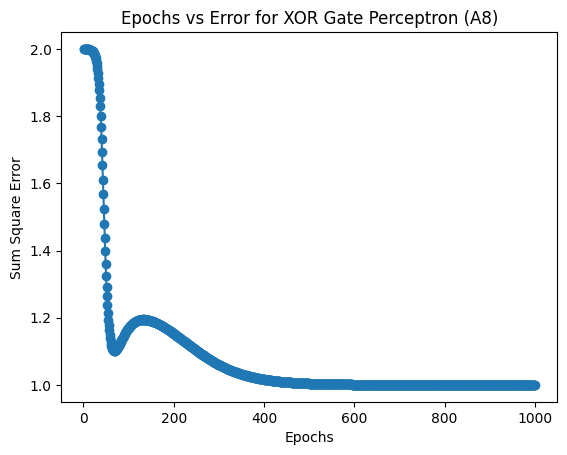

In [29]:
#A8
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, input_size, learning_rate, initial_weights):
        self.weights = np.array(initial_weights)
        self.learning_rate = learning_rate
        self.errors = []
    def sigmoid_activation(self, net_input):
        return 1 / (1 + np.exp(-net_input))
    def apply_activation(self, net_input):
        return self.sigmoid_activation(net_input)
    def calculate_error(self, inputs, targets):
        total_error = 0
        for input_data, target in zip(inputs, targets):
            net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
            predicted_output = self.apply_activation(net_input)
            total_error += (target - predicted_output) ** 2
        return total_error
    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            total_error = self.calculate_error(inputs, targets)
            self.errors.append(total_error)
            for input_data, target in zip(inputs, targets):
                net_input = np.dot(input_data, self.weights[1:]) + self.weights[0]
                predicted_output = self.apply_activation(net_input)
                error = target - predicted_output
                self.weights[1:] += self.learning_rate * error * input_data
                self.weights[0] += self.learning_rate * error
initial_weights_xor = [10, 0.2, -0.75]
learning_rate_xor = 0.05
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets_xor = np.array([0, 1, 1, 0])
activation_function_xor = 'sigmoid'
# Creating and training the perceptron for XOR gate
xor_perceptron = Perceptron(input_size=2, learning_rate=learning_rate_xor, initial_weights=initial_weights_xor)
epochs_xor = 1000
xor_perceptron.train(inputs_xor, targets_xor, epochs_xor)
# Testing the perceptron
for i, input_data in enumerate(inputs_xor):
    predicted_output = np.round(xor_perceptron.apply_activation(np.dot(input_data, xor_perceptron.weights[1:]) + xor_perceptron.weights[0]))
    print(f"Input: {input_data}, Predicted Output: {int(predicted_output)}")
plt.plot(range(1, len(xor_perceptron.errors) + 1), xor_perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum Square Error')
plt.title('Epochs vs Error for XOR Gate Perceptron (A8)')
plt.show()


In [18]:
#A9
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1], [0, 1], [0, 1], [1, 0]])  
np.random.seed(0)
input_layer_neurons = 2
hidden_layer_neurons = 4  
output_neurons = 2
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
output_bias = np.random.uniform(size=(1, output_neurons))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def back_propagation(X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate):
    max_iterations = 10000  # Increase the number of iterations
    convergence_error = 0.002
    for i in range(max_iterations):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        predicted_output = sigmoid(output_layer_input)
        error = y - predicted_output
        if np.mean(np.abs(error)) <= convergence_error:
            print(f'Converged at iteration {i + 1}.')
            break
        output_delta = error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        output_bias += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate
        hidden_bias += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return hidden_weights, hidden_bias, output_weights, output_bias
learning_rate = 0.05
trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias = back_propagation(
    X, y, hidden_weights, hidden_bias, output_weights, output_bias, learning_rate)
def predict(X, trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias):
    hidden_layer_input = np.dot(X, trained_hidden_weights) + trained_hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, trained_output_weights) + trained_output_bias
    predicted_output = sigmoid(output_layer_input)
    return np.round(predicted_output)
print("Input\t\tOutput")
for i in range(len(X)):
    prediction = predict(X[i], trained_hidden_weights, trained_hidden_bias, trained_output_weights, trained_output_bias)
    print(f"{X[i]}\t\t{prediction}")

Input		Output
[0 0]		[[0. 1.]]
[0 1]		[[0. 1.]]
[1 0]		[[0. 1.]]
[1 1]		[[1. 0.]]


In [41]:
#A10
from sklearn.neural_network import MLPClassifier
import numpy as np
# Define the AND gate input and output
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
# Define the XOR gate input and output
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
# Function for train and test the model
def train_and_test(X, y, gate_name):
    clf = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=5000, random_state=1)
    clf.fit(X, y)
    print(f"{gate_name} Gate:")
    for i in range(len(X)):
        prediction = clf.predict([X[i]])
        print(f"{X[i]} => {prediction}")
train_and_test(X_and, y_and, "AND")
train_and_test(X_xor, y_xor, "XOR")


AND Gate:
[0 0] => [0]
[0 1] => [0]
[1 0] => [0]
[1 1] => [1]
XOR Gate:
[0 0] => [0]
[0 1] => [1]
[1 0] => [1]
[1 1] => [0]


In [5]:
#A11
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
data = pd.read_csv(r"‪C:\Users\Dell\Documents\dataset\Training.csv")
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42))
])
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Ingredients']), data['Ingredients'], test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# MLP claasifier is not being acciplcable to our dataset images and the path is also not being accepted

OSError: [Errno 22] Invalid argument: '\u202aC:\\Users\\Dell\\Documents\\dataset\\Training.csv'